In [7]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [3]:
uploaded = files.upload()

Saving PessoaNormBinary.csv to PessoaNormBinary.csv


In [4]:
dados = pd.read_csv(io.BytesIO(uploaded['PessoaNormBinary.csv']))

In [8]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit(dados)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [9]:
unique, counts = np.unique(cluster.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 3, 1: 4, 2: 3}

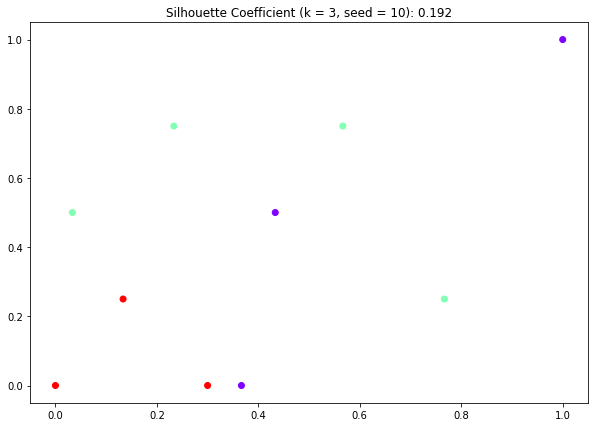

In [10]:
plt.figure(figsize=(10,7))
plt.title("Silhouette Coefficient (k = 3, seed = 10): %0.3f" 
% silhouette_score(dados, cluster.labels_))
plt.scatter(dados.iloc[:,0], dados.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [11]:
cluster.fit_predict(dados)

array([0, 2, 0, 1, 1, 1, 2, 1, 0, 2])

In [12]:
dados["Cluster"] = cluster.labels_
dados["Cluster"] = 'cluster' + dados["Cluster"].astype(str)

In [13]:
print(dados)

      Idade  Qt_Filhos  Renda_Bruta  ...  Cart_Sim  Imovel_P_Sim   Cluster
0  0.433333       0.50     0.456522  ...       1.0           1.0  cluster0
1  0.300000       0.00     0.293478  ...       1.0           0.0  cluster2
2  1.000000       1.00     1.000000  ...       1.0           0.0  cluster0
3  0.033333       0.50     0.076087  ...       0.0           1.0  cluster1
4  0.766667       0.25     0.228261  ...       1.0           1.0  cluster1
5  0.566667       0.75     0.250000  ...       1.0           0.0  cluster1
6  0.133333       0.25     0.369565  ...       1.0           0.0  cluster2
7  0.233333       0.75     0.728261  ...       1.0           1.0  cluster1
8  0.366667       0.00     0.521739  ...       0.0           0.0  cluster0
9  0.000000       0.00     0.000000  ...       0.0           0.0  cluster2

[10 rows x 13 columns]
